In [46]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import cdist 
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [47]:
input_iris_data = pd.read_table("1649181792_01407_1604554690_4994035_1601384279_9602122_iris_new_data.txt", header=None, skip_blank_lines=False, delim_whitespace=True)

input_iris_data.values

array([[5.7, 4.4, 1.5, 0.4],
       [5.5, 4.2, 1.4, 0.2],
       [5.2, 4.1, 1.5, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [7.7, 3.8, 6.7, 2.2],
       [7.9, 3.8, 6.4, 2. ],
       [5.1, 3.8, 1.9, 0.4],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.6, 0.2],
       [5.1, 3.8, 1.5, 0.3],
       [5.1, 3.7, 1.5, 0.4],
       [5.4, 3.7, 1.5, 0.2],
       [5.3, 3.7, 1.5, 0.2],
       [7.2, 3.6, 6.1, 2.5],
       [5. , 3.6, 1.4, 0.2],
       [4.6, 3.6, 1. , 0.2],
       [5. , 3.5, 1.6, 0.6],
       [5.2, 3.5, 1.5, 0.2],
       [5.1, 3.5, 1.4, 0.3],
       [5.1, 3.5, 1.4, 0.2],
       [5. , 3.5, 1.3, 0.3],
       [5.5, 3.5, 1.3, 0.2],
       [6.3, 3.4, 5.6, 2.4],
       [6.2, 3.4, 5.4, 2.3],
       [6. , 3.4, 4.5, 1.6],
       [4.8, 3.4, 1.9, 0.2],
       [5.4, 3.4, 1.7, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [4.8, 3.4, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.1, 3.4, 1.5, 0.2],
       [5. , 3.4, 1.5, 0.2],
       [4.6, 3

In [48]:
def kmeans(a,k, iterations):
    index = np.random.choice(len(a), k, replace=False)
    centroids = a[index, :]
    distances = cdist(a, centroids ,'cosine')
    points = np.array([np.argmin(i) for i in distances])
    for _ in range(iterations):
      centroids = []
      for index in range(k):
        temp = a[points==index].mean(axis=0)
        centroids.append(temp)
      centroids = np.vstack(centroids)
      distances = cdist(a, centroids ,'cosine')
      points = np.array([np.argmin(i) for i in distances])
    return points

In [49]:
output_iris = kmeans(input_iris_data.values,3,1000)

print(output_iris)

np.savetxt("Output_iris_data.txt",output_iris,fmt="%s")

[0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 2 2 1 0 0 0 0 0 0 0 0 0 2
 2 2 1 0 0 2 2 2 2 2 2 1 1 0 0 0 0 0 2 2 2 2 1 1 1 0 0 0 0 0 2 2 2 2 2 2 2
 2 2 2 1 2 2 1 2 2 1 1 1 1 0 0 0 0 0 0 2 2 1 1 1 1 1 1 1 0 2 2 2 2 2 2 2 2
 1 1 1 1 1 1 2 2 2 2 2 1 1 1 1 2 2 1 1 1 2 2 2 2 2 1 1 1 1 1 1 1 1 1 0 2 1
 1 1]


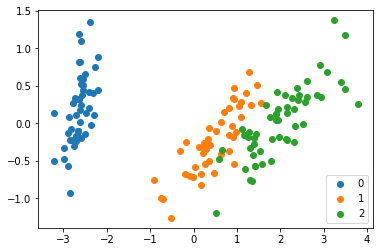

50

In [50]:
pca = PCA(2)
dx = pca.fit_transform(input_iris_data)
u_labels = np.unique(output_iris)
for j in u_labels:
    plt.scatter(dx[output_iris == j , 0] , dx[output_iris == j , 1] , label = j)
plt.legend()
plt.show()
len(dx[output_iris == 0])

In [51]:
part2 = pd.read_table("/content/1649182019_5350096_1604556007_243332_1601384482_8387134_image_new_test.txt", delimiter =",",header=None)

In [52]:
def kmeans(a,k, iterations):
    index = np.random.choice(len(a), k, replace=False)
   
    centroids = a[index, :] 
     
    dist = cdist(a, centroids ,'cosine')

    points = np.array([np.argmin(i) for i in dist])
    
    for _ in range(iterations): 
        centroids = []
        for index in range(k):
            temp = a[points==index].mean(axis=0) 
            centroids.append(temp)
 
        centroids = np.vstack(centroids) 
        dist = cdist(a, centroids ,'cosine')
        points = np.array([np.argmin(i) for i in dist])
         
    return [points,centroids];

In [70]:
test = kmeans(part2.values,10,50)

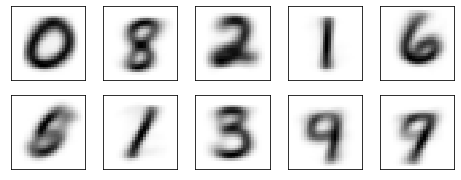

In [71]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
center =test[1].reshape(10,28,28)
for axi, center in zip(ax.flat, center):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [75]:
def sum_squ_err(y,y1):
  summation = 0 
  l = len(y)

  for i in range (1,l):
    diff = y[i] - y1[i] 
    squ_diff = diff**2  
    summation = summation + squ_diff 
  return summation/l  

distortions = []

K = [2,4,6,8,10,12,14,16,18,20]
y = kmeans(part2.values,10,50)   
 
for k in K:

    kmeanModel2 = kmeans(part2.values,k,50)    
    m=kmeanModel2[0]

    distortions.append(sum_squ_err(y[0],m))

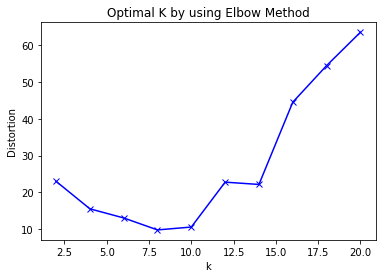

In [76]:
plt.figure()
plt.plot(K, distortions, 'bx-')
plt.title('Optimal K by using Elbow Method')
plt.xlabel('k')
plt.ylabel('Distortion')

plt.show()

In [77]:
pca = PCA(n_components=72)
res_pca = pca.fit_transform(part2)
print('Variation/principal: {}'.format(pca.explained_variance_ratio_))
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2,perplexity=8,verbose=1,n_iter=250)
res_tsne_pca = tsne.fit_transform(res_pca)

Variation/principal: [0.10047663 0.07544487 0.06140516 0.05425807 0.05031249 0.04246363
 0.03311404 0.02950288 0.02729858 0.02278041 0.02133899 0.02095204
 0.01725898 0.01685758 0.01576077 0.01494562 0.01302506 0.01278467
 0.01180118 0.011483   0.0106641  0.01027178 0.00979715 0.00901867
 0.00888231 0.00826573 0.00799743 0.00765838 0.00717514 0.00687256
 0.00649144 0.00627159 0.00590284 0.00581759 0.00544738 0.00541655
 0.00507243 0.00481121 0.00460166 0.00451523 0.00437027 0.00424364
 0.00412964 0.00389631 0.00378241 0.00370461 0.00358284 0.00331726
 0.00326815 0.00311841 0.00304069 0.00297838 0.00288484 0.002787
 0.00273016 0.00262954 0.00254961 0.0025301  0.00244545 0.00241423
 0.00234341 0.00233317 0.00223033 0.00215473 0.00208494 0.0020192
 0.00199294 0.00188052 0.00186784 0.00184363 0.00178874 0.00173455]
[t-SNE] Computing 25 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.002s...


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computed neighbors for 10000 samples in 2.925s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 350.140895
[t-SNE] KL divergence after 250 iterations with early exaggeration: 92.475990
[t-SNE] KL divergence after 251 iterations: 1797693134862315708145274237317043567980705675258449965989174768031572607800285387605895586327668781715404589535143824

In [78]:
tag = kmeans(res_tsne_pca,10,50)
print((tag[0]))

[6 3 0 ... 0 2 7]


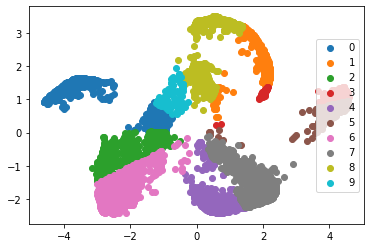

<Figure size 1440x1440 with 0 Axes>

In [79]:
u_tag = np.unique(tag[0])
for i in u_tag:
    plt.scatter(res_tsne_pca[tag[0] == i , 0] , res_tsne_pca[tag[0] == i , 1] , label = i)

plt.legend(loc='center right')
plt.figure(figsize=(20,20))
plt.show()

In [80]:
np.savetxt("output_image_data.txt",tag[0],fmt="%s")